# EDA for vehicles dataset

In this notebook, I will perform an exploratory data analysis of used car sales data. I will try to examine what factors can indicate a quick sale of a used car.

## Step 1: imports

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import numpy as np 
from IPython.display import display


## Step 2: Loading the data set from the file and initial exploration

In [69]:
df = pd.read_csv("../vehicles_us.csv")

In [70]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Filling up missing values

 Since there are columns with empty cells, I would like to fill them in. For each column, I will try to find the most analytically correct value. This way, each cell will have a value and it will be easier for me to analyze (and later, find duplicates), but the results will remain the same.

* For the paint_color column, I will add the word "Unknown" to any cell that does not contain a value.

In [72]:
df['paint_color']=df['paint_color'].fillna('Unknown')

* Checking to see if everything went well: 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


* For the is_4wd column, I will fill in the gaps with 0's , assuming not having information means it is not a 4wd. 

In [74]:
df['is_4wd']=df['is_4wd'].fillna(0)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


* For the model_year column: For this column, I will choose to fill in the median model year for all the cars of the same model. I will do this by using the groupby function and then, by passing through transform on each group, so that the median value of the group itself will be completed in the empty cells.

In [77]:
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


* For the odometer column: For this column, we can assume that cars of the same year have a similar odometer reading. Therefore, I will do a calculation similar to what I did in the previous column, only this time I will use the mean (because it seems better in my opinion)

In [80]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('mean'))

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


* I see that there is a single specific cell that did not receive a value. This means that we can assume that what happened is that the mean of its year is full of NaN values. Therefore, what I will do is find this specific value and give it the mean of all the data from the same file.

In [83]:
mean_2=df['odometer'].mean()
df['odometer'] = df['odometer'].fillna(mean_2)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


* for cylinders column: For this column, as in the previous two columns, I will use transform. This time, I need to keep the value whole. Therefore, I will perform a mean on the data and round down. The decision to round down (and not up) is an arbitrary one, which I assume could have an impact on my analysis. And indeed, I will need to address this part in the conclusions.

In [88]:

new_cylinders = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('mean'))
df['cylinders']=np.floor(new_cylinders)
print(df['cylinders'].unique())

[ 6.  4.  8.  5.  7. 10.  3. 12.]


* After my calculation, I printed the unique values. I see that indeed, no value is a float. Unfortunately, I do not understand enough about cars to verify that the new cylinder value I gave is indeed logical. It is possible that this point could affect the results of the analysis. Consciously, I am deciding not to do any analysis with the data from this column, in case that what I said before is indeed true (that the value I gave is not accurate from a mechanical point of view of cars).

### Checking for duplicates

In [91]:
df=df.drop_duplicates()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


* I see that after this check, all the values have remained quantitatively the same in each of the columns. Therefore, I conclude from this that there are no duplicate values that could bias the analysis.

## Step 3: In depth exploration 

* I want to examine the 'date_listed' column and see how it behaves:

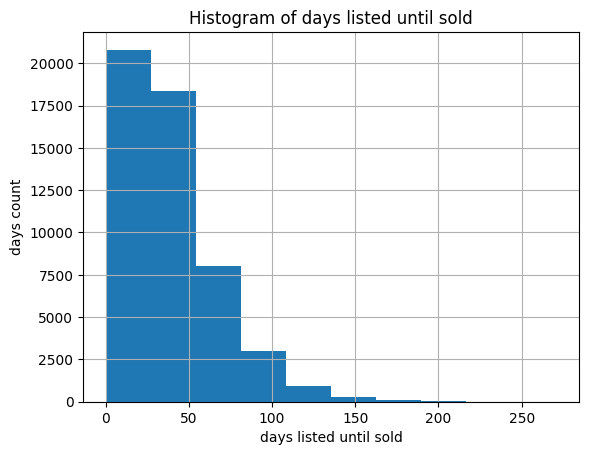

In [95]:
df.days_listed.hist()
ax=plt.gca()
ax.set_xlabel("days listed until sold")
ax.set_ylabel("days count")
ax.set_title("Histogram of days listed until sold")
plt.show()

* As evident from the histogram, the majority of cars are sold within a very short period of time.

* Now, I'd like to take a look at the car color. First, I'll check out the different categories. This is a categorical variable, so I'll use the value_counts function.

In [97]:
df.paint_color.value_counts()

paint_color
white      10029
Unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: count, dtype: int64

* It's evident that the category of cars with unknown color (listed without a color, because i filled in the blanks)  is the second-largest category. Therefore, it's essential to address it. And I'm curious to examine whether cars with their color specified in the listing sell faster than cars with unknown color.

In [98]:
color_index=[]
for c in df.paint_color:
    if c== 'Unknown':
        color_index.append(False)
    else:
        color_index.append(True)
df["color_index"]=color_index

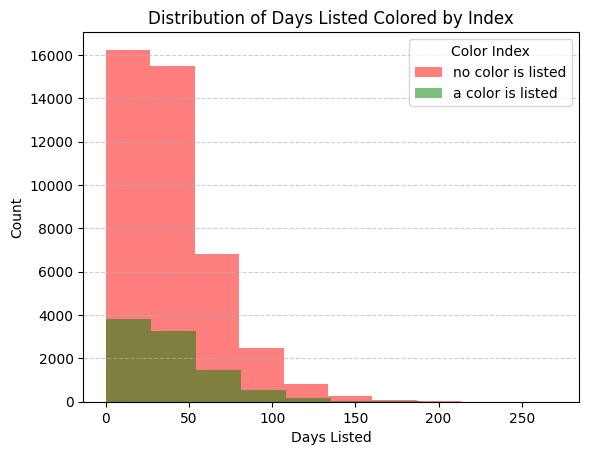

In [99]:
days_listed = df["days_listed"]
color_index = df["color_index"] 

days_listed_with_color = df[df["color_index"]]["days_listed"].values
days_listed_no_color = df[~df["color_index"]]["days_listed"].values


plt.hist(days_listed_with_color, alpha=0.5, label="no color is listed", color="red")
plt.hist(days_listed_no_color, alpha=0.5, label="a color is listed", color="green")


plt.xlabel("Days Listed")
plt.ylabel("Count")
plt.title("Distribution of Days Listed Colored by Index")
plt.legend(title="Color Index")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

* As can be seen, even though the graphs are not normalized, they behave the same. If you would like to see the normalized version, you can find it in: app.py

* Now let's examine how the car's condition affects the vehicle's sales speed. The graph will be unnormalized, like the previous one. However, we can get an initial understanding of how the data behaves.


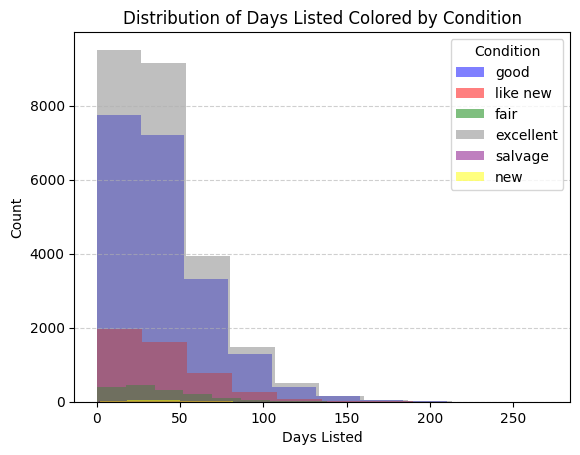

In [100]:
days_listed = df["days_listed"]
condition = df["condition"] 

color_list=["blue", "red", "green", "grey", "purple", "yellow"]
cond_list=df["condition"].unique()

for i in range(len(cond_list)):
    data=df[df["condition"]==cond_list[i]]["days_listed"]
    plt.hist(data, alpha=0.5, label=cond_list[i], color=color_list[i])



plt.xlabel("Days Listed")
plt.ylabel("Count")
plt.title("Distribution of Days Listed Colored by Condition")
plt.legend(title="Condition")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

*We notice that there are some car conditions with very few data points (as can be shown below). Therefore, we want to omit them to obtain a more accurate analysis.

In [101]:
df.condition.value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [102]:
cond_index=[]
for c in df.condition:
    if c in ["excellent", "good", "like new"]:
        cond_index.append(True)
    else:
        cond_index.append(False)
df2=df[cond_index]


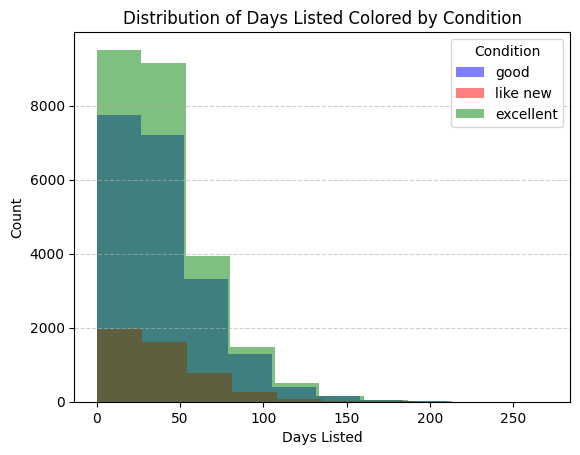

In [103]:
days_listed = df2["days_listed"]
condition = df2["condition"] 

color_list=["blue", "red", "green", "grey", "purple", "yellow"]
cond_list=df2["condition"].unique()

for i in range(len(cond_list)):
    data=df2[df2["condition"]==cond_list[i]]["days_listed"]
    plt.hist(data, alpha=0.5, label=cond_list[i], color=color_list[i])



plt.xlabel("Days Listed")
plt.ylabel("Count")
plt.title("Distribution of Days Listed Colored by Condition")
plt.legend(title="Condition")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

* And again, the distribution looks the same. 

*Now I would like to examine whether there have been changes in the car sales market over the years. I'll make a column that contains only the month (and the year, without the day) , aginst the  numbers of cars that have been sold. 

In [104]:
trim_date=[]
for d in df.date_posted:
    trim_date.append(d[:-3])
df["trim_date"]=trim_date
df.trim_date.value_counts()

trim_date
2018-10    4643
2018-12    4564
2019-03    4559
2018-05    4503
2018-08    4480
2018-07    4471
2018-09    4452
2019-01    4452
2018-11    4354
2018-06    4216
2019-02    4014
2019-04    2817
Name: count, dtype: int64

* For the last month, its count was significantly lower than the others. Therefore, we will remove it. This could be due to an incomplete count during that month. In any case, it is an outlier that we want to exclude from the analysis.

In [105]:
date_index=[]
for d in df.trim_date:
    if c in ["2019-04"]:
        date_index.append(False)
    else:
        date_index.append(True)
df3=df[date_index]

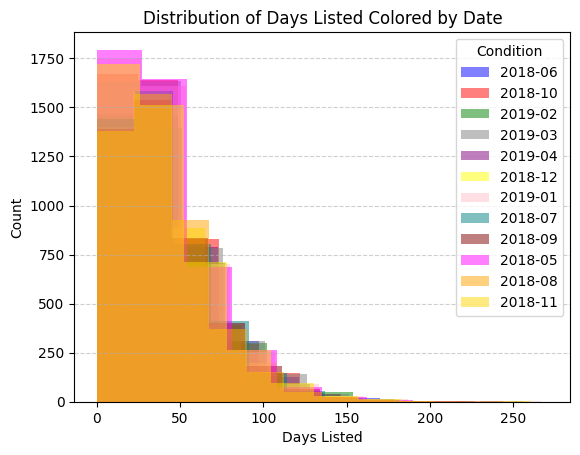

In [106]:
days_listed = df3["days_listed"]
trim_date = df3["trim_date"] 

color_list=["blue", "red", "green", "grey", "purple", "yellow", "pink", "teal", "maroon", "magenta", "orange", "gold"]
date_list=df3["trim_date"].unique()

for i in range(len(date_list)):
    data=df3[df3["trim_date"]==date_list[i]]["days_listed"]
    plt.hist(data, alpha=0.5, label=date_list[i], color=color_list[i])



plt.xlabel("Days Listed")
plt.ylabel("Count")
plt.title("Distribution of Days Listed Colored by Date")
plt.legend(title="Condition")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

* Here as well, we observe that despite the data not being normalized, the behavior is very similar.


* And therefore, I am going to continue analyzing, and this time I will investigate the relationship between the number of days until the car was sold and its price.

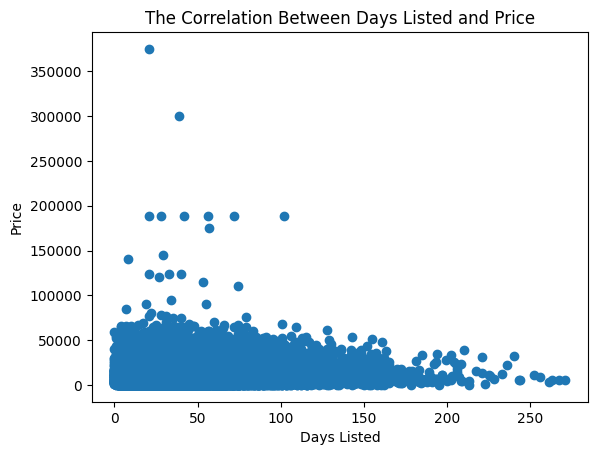

In [107]:

plt.scatter(x=df["days_listed"], y=df["price"])
plt.xlabel("Days Listed")
plt.ylabel("Price")
plt.title("The Correlation Between Days Listed and Price")
plt.show()

* There are data points with very high prices (significantly higher than other prices), which significantly distorts the scope for us. Therefore, we will omit them - since they are very few in number, and thus we can get a better view of what is happening in the graph.

In [108]:
res_price=[]
for p in df.price:
    if p>150000:
        res_price.append(False)
    else:
        res_price.append(True)

df4=df[res_price]

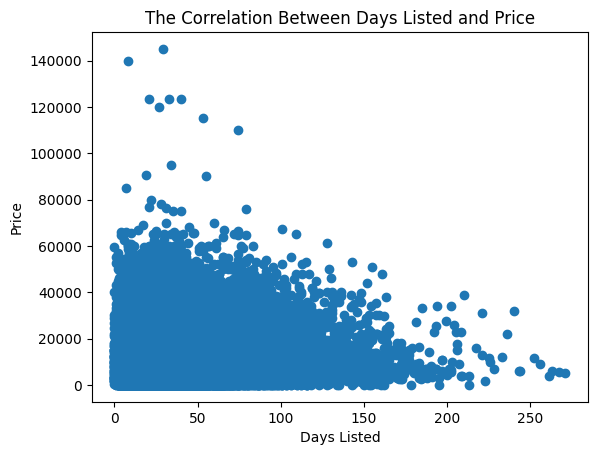

In [109]:
plt.scatter(x=df4["days_listed"], y=df4["price"])
plt.xlabel("Days Listed")
plt.ylabel("Price")
plt.title("The Correlation Between Days Listed and Price")
plt.show()

## Step 4: Conclusions

So far, I have examined several factors that can affect the speed at which a car is sold. Unfortunately, I did not reach a definitive conclusion until I got to the price section. In the price section, as can be seen in app.py, a lower price can explain a faster sale. However, as I also explained there, not every low price will lead to a quick sale.
Another point worth considering is how I chose to complete the missing data. I did this for several columns, but only one implementation decision could affect the analysis (since the other decisions were not taken into account during the current analysis): and that is the statement that a car with no specified color is changed from NaN to "Unknown". Of course, from a purely analytical point of view, there is no difference in the calculations. But it is important conceptually to understand that a car with no specified color is not a car whose color is necessarily unknown. Rather, it is only unknown for the purposes of the analysis. It is possible that there was a deliberate decision not to specify the color of the car in the ad. In any case, if we want to continue with the analysis, we need to take into account, in the other columns that I filled in, that the way the filling was done may not have been accurate and does not necessarily correspond to reality, as I have detailed in this notebook in previous sections.